## Bike Sharing Assignment

Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing libraries and Reading dataset(s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".2", "grid.linestyle": ":"})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reding data
df = pd.read_csv('../input/bike-sharing/day.csv')

Rdimentary inspection of dataset

In [4]:
df.shape

(730, 16)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB




> There are no missing values, we can go ahead with further inspection.


## Initial Preperation and Outlier Analysis

In [7]:
#count of unique values in each column
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

A quick look at data and data-dictionary reveals that the variables,


> ***season***,  ***yr***,  ***mnth***,  ***holiday***,  ***weekday***, ***workingday***,  ***weathersit***




are catagorical columns. More specifically, they are all nominal catagorical variables. These variables need to be converted to the values that they have been encoded from, except binary catagories.




In [8]:
#mapping values
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})
df['mnth'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df['holiday'] = df['holiday'].map({0: 'no', 1: 'yes'})
df['weekday'] = df['weekday'].map({0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'})
df['workingday'] = df['workingday'].map({0: 'no', 1: 'yes'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'LightRain', 4: 'HeavyRain'})

The columns ***'instant'*** is just a record index which we don't need because we already have one. ***'dteday'*** is a redundant columns as all the information that it carries is explained by the columns, ***'yr'***, ***'mnth'*** and ***'weekday'***.

So, we can drop these columns.

In [9]:
#dropping columns
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,Friday,no,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,Saturday,no,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,Sunday,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,Monday,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,Tuesday,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df.weathersit.value_counts()

Clear        463
Cloudy       246
LightRain     21
Name: weathersit, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.0+ KB


In [14]:
#statistical summary of quantitative variables
df.select_dtypes(include = np.number).describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
#Function for visualizing numerical variables, box plot
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)

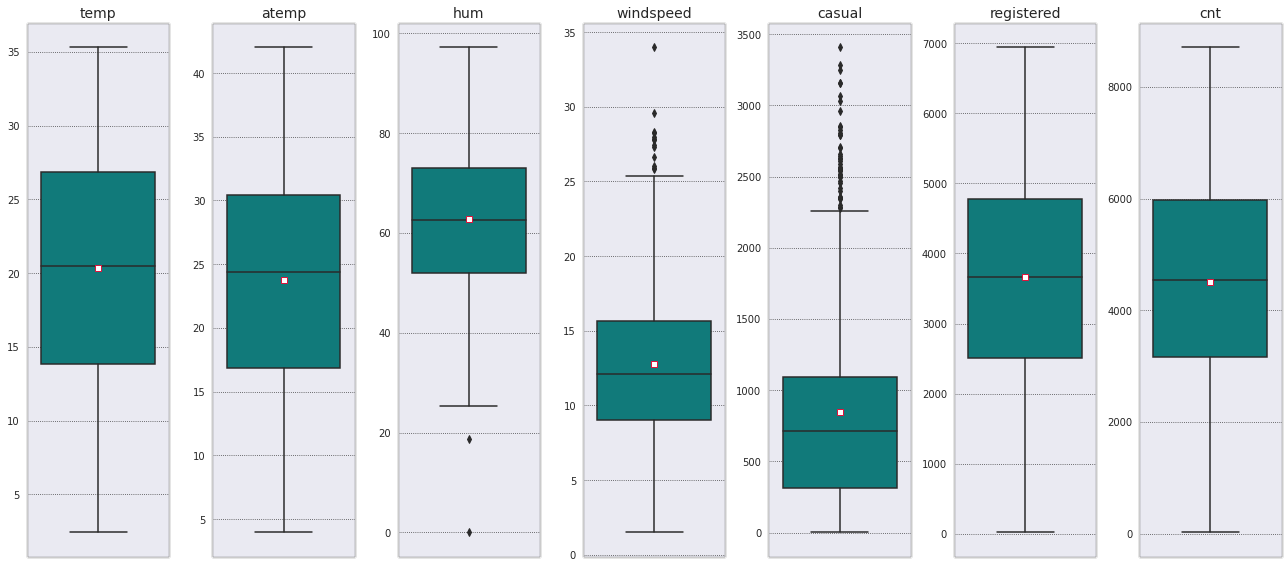

In [16]:
plt.figure(figsize = [18,8])
cols = [col for col in df.select_dtypes(include = np.number).columns]
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    box_plot(cols[i])
plt.tight_layout()

Humidity can not be zero, let's look at records that have zero humidity

In [17]:
df[df.hum == 0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,spring,2018,Mar,no,Wednesday,yes,LightRain,15.952731,19.2834,0.0,17.545759,46,577,623


Everyother variable look good, so, replace with mean.

In [18]:
#replacing with mean
df.hum.replace({0: df.hum.mean()}, inplace = True)

In [19]:
#other sanity check
df[df.cnt != df.casual + df.registered]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


All other values are in right ranges. We can move on to EDA.

## Exploratory Data Analysis

mean    4508.006849
std     1936.011647
Name: cnt, dtype: float64

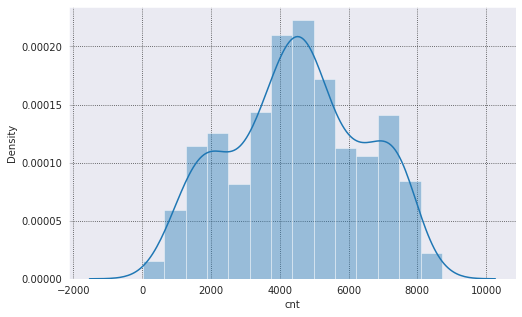

In [20]:
#visualiing target
plt.figure(figsize = [8,5])
sns.distplot(df.cnt)
df.cnt.agg([np.mean, np.std])

### Catagorical variables

In [21]:
#Function for visualizing composition of levels in catagorical variables, count plot
def count_plot(x, p = 'deep'):
    ax = sns.countplot(df[x],  palette = p)
    ax.set_title('{} Composition'.format(x), fontsize = 15, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)  
    for k in ax.patches:
        ax.annotate('{:.1f}%'.format(k.get_height()/df.shape[0]*100),(k.get_x()+0.25, k.get_height()))

#Function for visualizing catagorical(by aggregating a numerical feature) variables, bar plot
def bar_plot(x, y, p = 'mako_r'):
    ax = sns.barplot(df[x], df[y], estimator = np.mean, palette = p, ci = None)
    ax.set_title('Average {} wrt {}'.format(y,x), fontsize = 15, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)
    for k in ax.patches:
        ax.annotate('{:.1f}'.format(k.get_height()),(k.get_x()+0.25, k.get_height()))

def hue_bar(x, y, z):
    with plt.style.context('seaborn-muted'):
        ax = sns.barplot(df[x], df[y], hue = df[z], ci = None)
        ax.patch.set_edgecolor('black')
        ax.patch.set_linewidth(1.2)  
        #plt.xticks(rotation = 45, ha = 'right')
        ax.set_title('Average {}'.format(y), fontsize = 15)

#Function for visualizing numerical and catagorical variables together, box plot
def box_plot2(x, y, p = 'deep'):
    ax = sns.boxplot(df[x], df[y], palette = p, showmeans = True)
    ax.set_title('Distribution of {}'.format(y), fontsize = 15, pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)

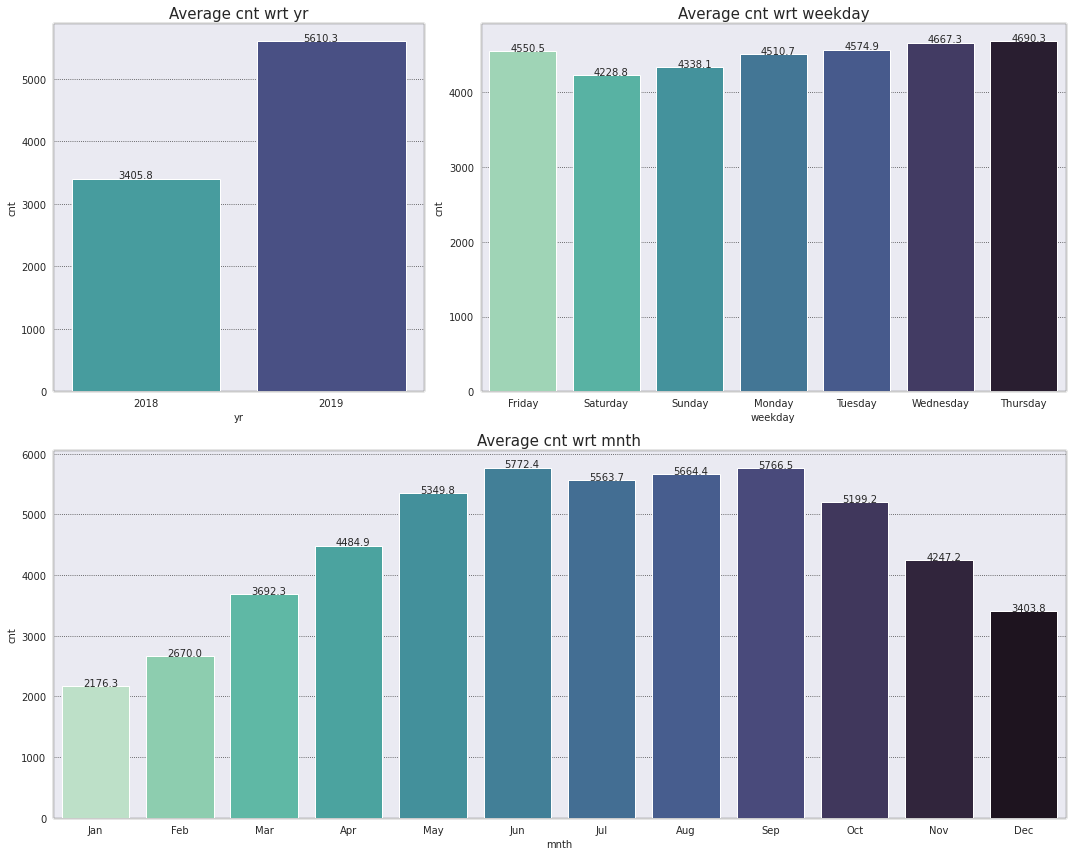

In [22]:
#year, month and weekday
plt.figure(figsize = [15,12])
G = plt.GridSpec(2,5)
plt.subplot(G[0,:2])
bar_plot('yr', 'cnt')
plt.subplot(G[0,2:])
bar_plot('weekday', 'cnt')
plt.subplot(G[1,:])
bar_plot('mnth', 'cnt')
plt.tight_layout()

> The count of total number of bikes rented has increased significantly.


> The number of rider is almost same on all days of the week. In case of months, the count is relatively high in the months from June to September. This could possibly be because of vacation time or discounts provided by company.





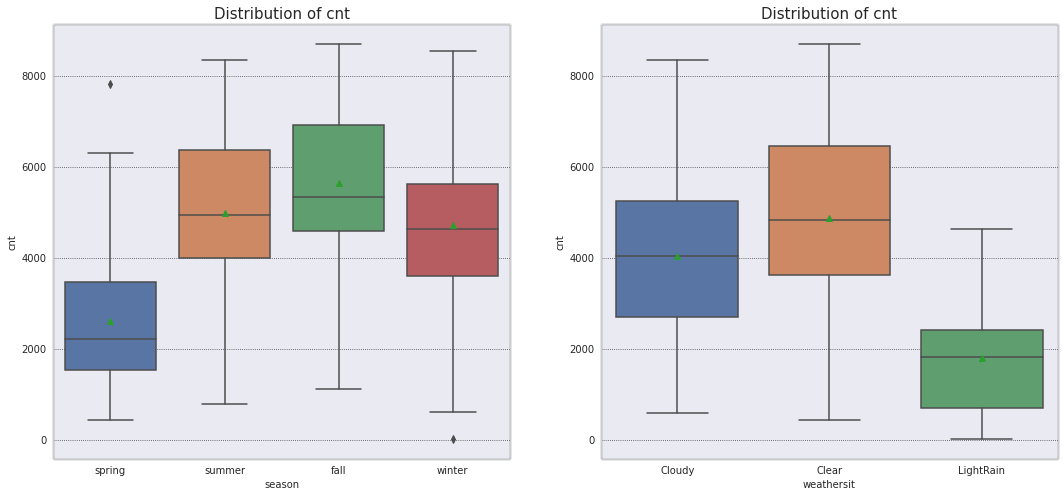

In [23]:
#Season and weathersit
plt.figure(figsize = [18,8])
plt.subplot(121)
box_plot2('season', 'cnt')
plt.subplot(122)
box_plot2('weathersit', 'cnt')



> Most number of bikes were rented in fall. This is most likely due to discounts provided by company.


> Also, mostly bikes were rented in when the weather was clear. Zero bikes were rented in heavy rain, which is understandable because no one rides bikes in heavy rain and thunderstorm.





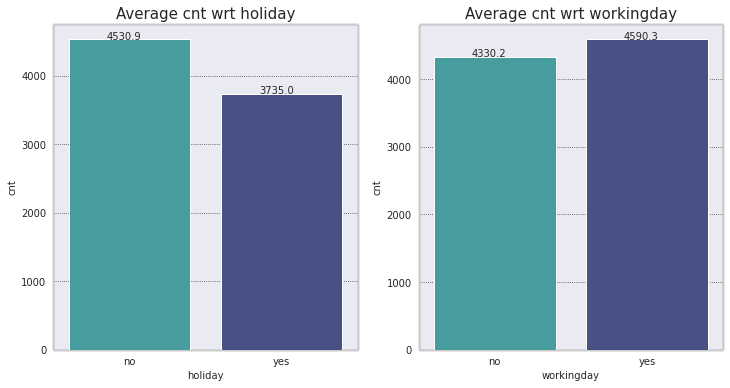

In [24]:
#holiday and workingday
plt.figure(figsize = [12,6])
plt.subplot(121)
bar_plot('holiday', 'cnt')
plt.subplot(122)
bar_plot('workingday', 'cnt')



> The average number of bikes rented is more on days that are not holidays. Also, more bikes were rented on non-working days.



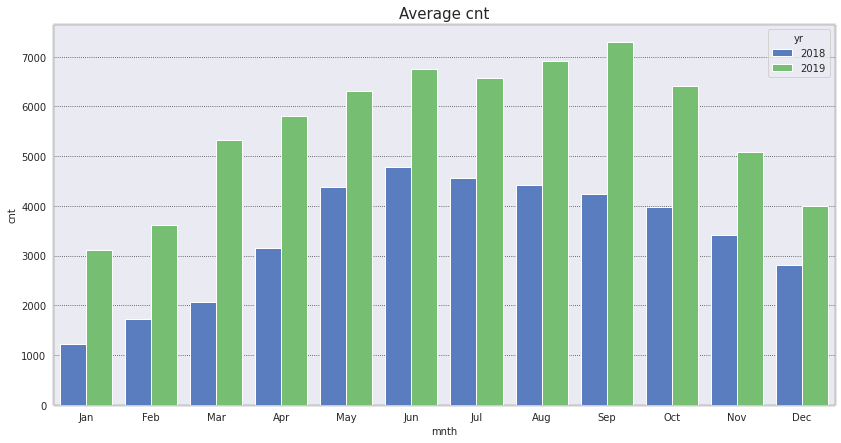

In [25]:
#year and month combined analysis
plt.figure(figsize = [14,7])
hue_bar('mnth', 'cnt', 'yr')

<AxesSubplot:xlabel='mnth'>

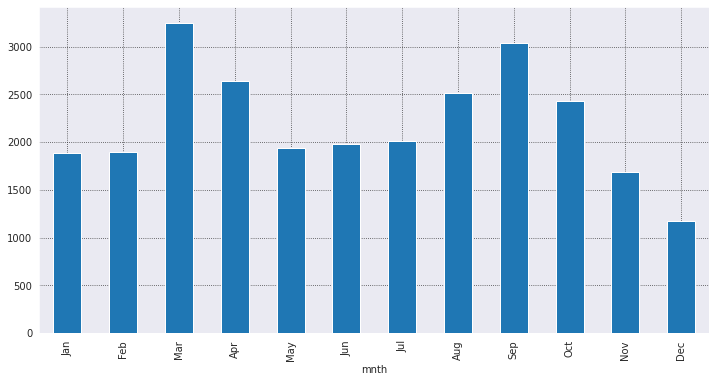

In [26]:
#increase in count of bikes rented from 2018 to 2019
x = df[df.yr == '2019'].groupby('mnth').cnt.mean() - df[df.yr == '2018'].groupby('mnth').cnt.mean()
x.reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]).plot(kind = 'bar', figsize = [12,6])



> The count appears to have increased most in months of march and september.



### Numerical Features

In [27]:
#distplot
def dist_plot(x, y):
    for i in df[x].unique():
        ax = sns.distplot(df[df[x] == i][y], label = i, kde_kws = {'linewidth':'2.2'})
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)
    plt.legend(prop = {'size': 12})

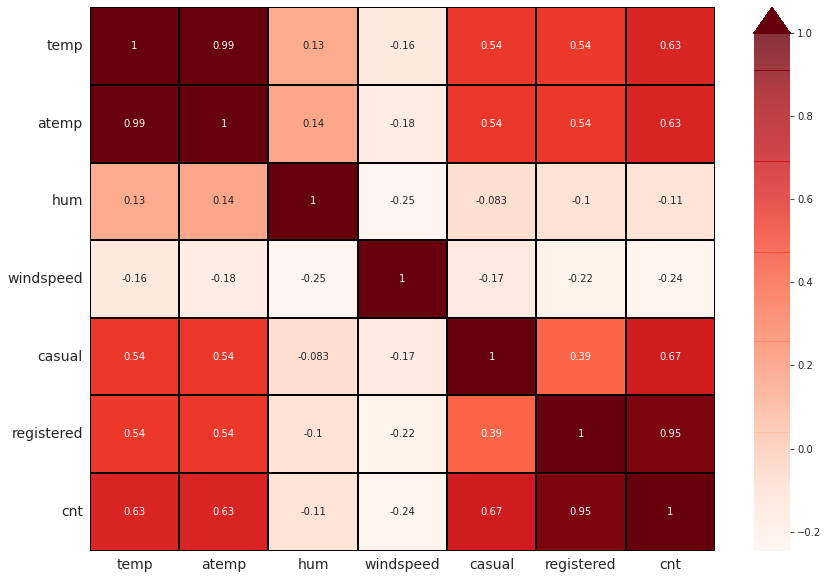

In [28]:
plt.figure(figsize = [14,10])
cbar_kws={'orientation':'vertical', 'shrink':1,'extend':'max',
          'extendfrac':0.05, 'drawedges':True, 'pad':0.05, 'aspect':15}
sns.heatmap(df.corr(), annot = True, cmap = 'Reds', linecolor = 'k', linewidth = 0.2, cbar_kws = cbar_kws)
plt.xticks(rotation = 0, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.show()



> temp and atemp are highly correlated. count of registered users also has a strong positive correlation with cnt, which is expected because most bikes were rented by registered users.



scatterplot of numerical variables with target

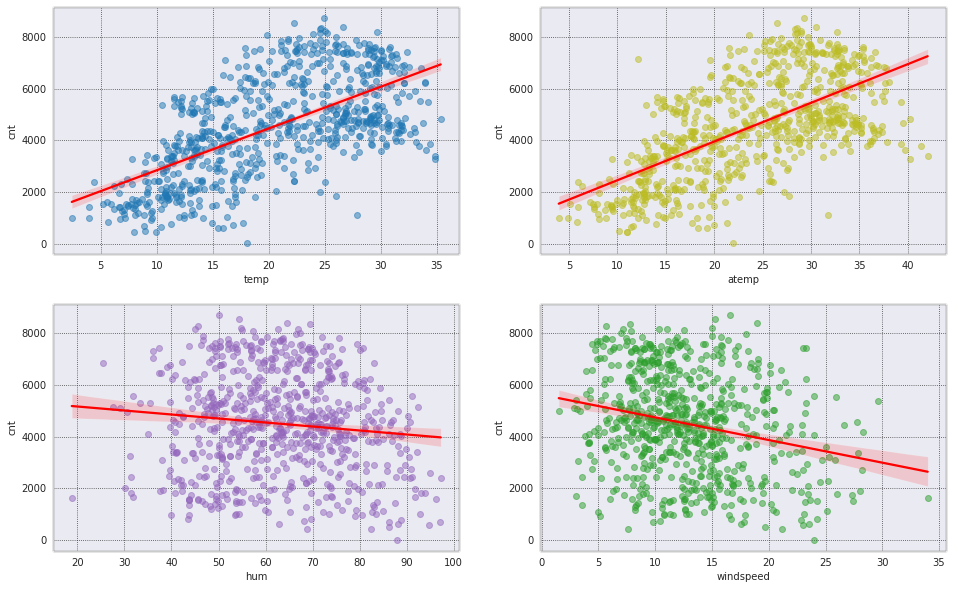

In [29]:
plt.figure(figsize = [16,10])
cols = ['temp', 'atemp', 'hum', 'windspeed']
color = ['tab:blue','tab:olive','tab:purple','tab:green']
for i in range(len(cols)):
    plt.subplot(len(cols)//2, len(cols)//2, i+1)
    ax = sns.regplot(df[cols[i]], df.cnt, line_kws = {'color':'red'}, scatter_kws = {'alpha': 0.5}, color = color[i])
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.2)



> Most bikes were rented in mid-range temperature, i.e, in [20, 30]. Riders decrease with increase in temperature above 30 and decrease below 20.


>Count of riders is less at high humidity levels and windspeed. High humidity indicates heavy precipitation and high windspeed is also an indicator of bad weather. So, it is clear that riders do not use bikes in extreme weather condition.





<Figure size 576x576 with 0 Axes>

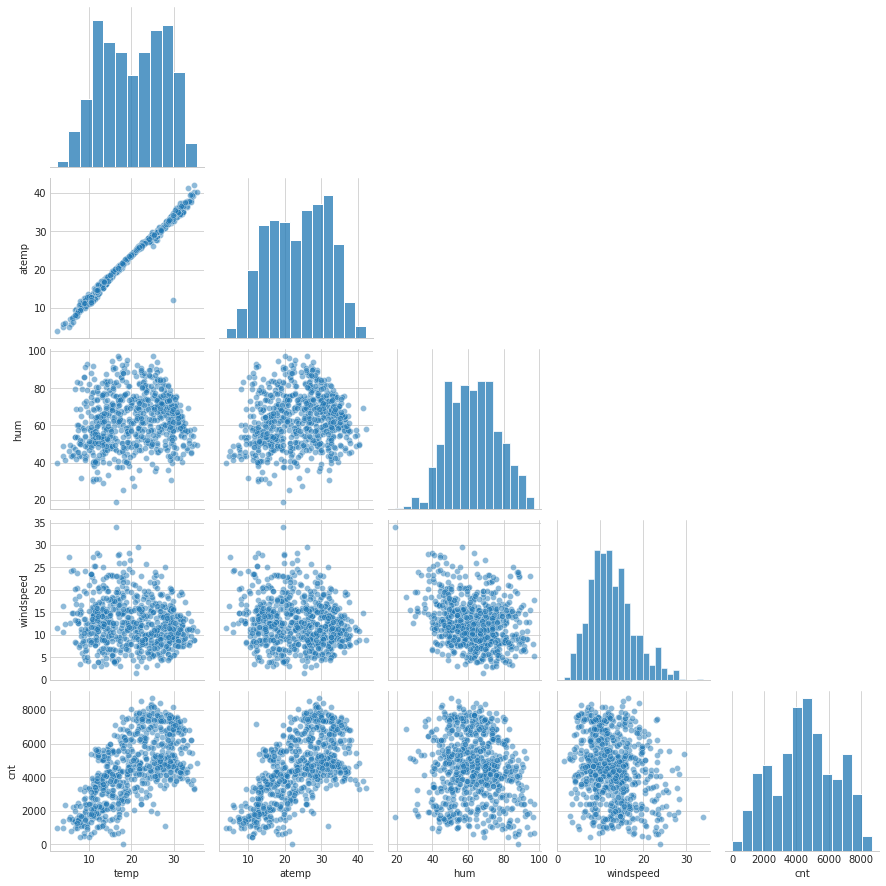

In [30]:
#visualizing relationship between numerical variables using pairplot
cols = [col for col in df.select_dtypes(include = np.number).columns if col not in ['casual','registered']]
plt.figure(figsize = [8,8])
with plt.style.context('seaborn-whitegrid'):
    sns.pairplot(df[cols], corner = True, plot_kws = {'alpha': 0.5})

<Figure size 576x576 with 0 Axes>

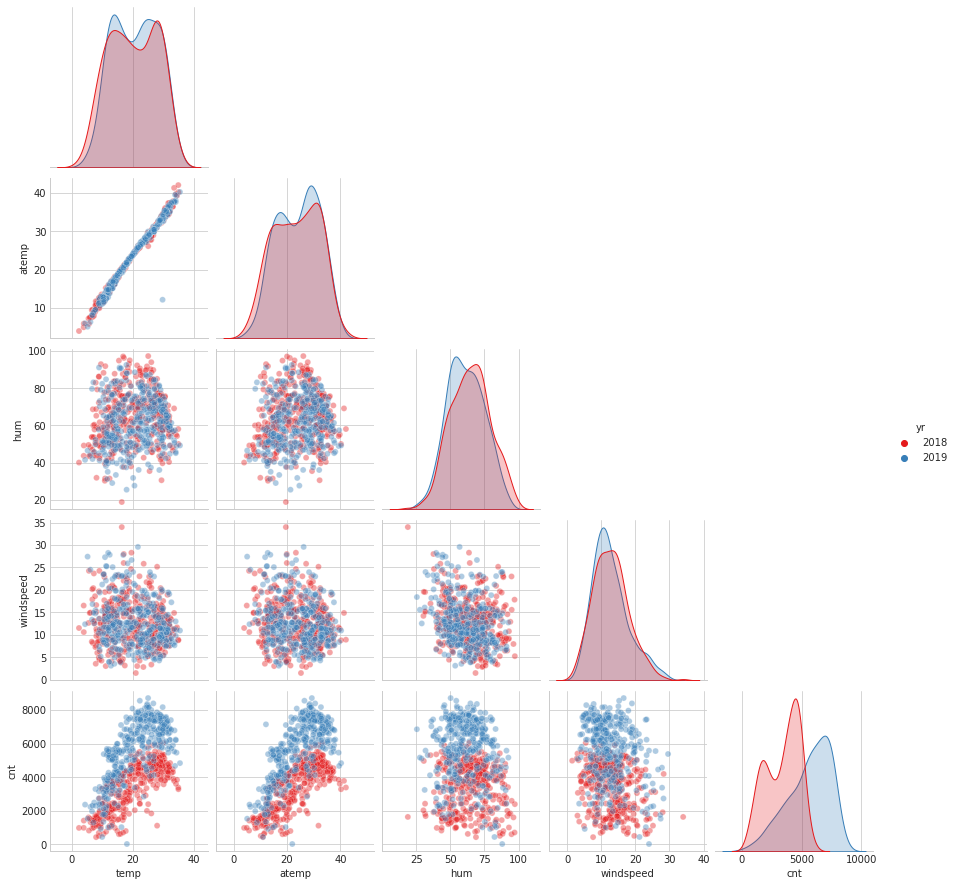

In [31]:
cols = [col for col in df.columns if col not in ['casual','registered']]
plt.figure(figsize = [8,8])
with plt.style.context('seaborn-whitegrid'):
    sns.pairplot(df[cols], hue = 'yr', corner = True, plot_kws = {'alpha': 0.4}, palette = 'Set1')

## Data Modeling

Importing important utilities

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# adjusted R-squared
def adjusted_r2(y, y_pred, X):
    return 1 - (1 - r2_score(y, y_pred)) * (X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)

In [34]:
#creating a copy of dataset
df_ = df.copy()

In [35]:
df_.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,no,Friday,no,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,no,Saturday,no,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,no,Sunday,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,no,Monday,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,no,Tuesday,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
df_.shape

(730, 14)

Removing columns, casual and registered from dataset as they are not independent variables and are not useful for model

In [37]:
#removing columns casual and registered
df_.drop(['casual', 'registered'], axis = 1, inplace = True)

In [38]:
cat_cols = [col for col in df_.select_dtypes(include = ['object', 'category']).columns]
num_cols = [col for col in df_.select_dtypes(include = np.number).columns if col != 'cnt']

In [39]:
num_cols

['temp', 'atemp', 'hum', 'windspeed']

In [40]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [41]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


### Preprocessing

Creating dummy variables for catagorical features

In [42]:
# List of variables to map
varlist =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the variables in list
df_[varlist] = df_[varlist].apply(binary_map)

In [43]:
df_.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Friday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Saturday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Sunday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Monday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Tuesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [44]:
#creating dummy variables for catagorical features
cols = ['season', 'yr', 'mnth', 'weekday', 'weathersit']
dummy_df = pd.get_dummies(df_[cols], drop_first = True)
dummy_df.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightRain
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
#concatenating the dummies with merged_data and overwriting merged_data
df_ = pd.concat([df_, dummy_df], axis = 1)

In [46]:
#dropping old catagorical columns as dummies have been created for them
df_.drop(cols, axis = 1, inplace = True)

In [47]:
df_.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightRain
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
#Seprating features from target
X = df_.drop('cnt', axis = 1)
y = df_['cnt']

In [49]:
#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 10)

In [50]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightRain
323,0,0,18.996653,22.85290,68.4583,12.458650,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
72,0,1,13.333897,16.60000,49.6957,9.174042,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
510,0,0,28.392500,32.13480,73.2500,13.332464,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
700,0,0,14.247500,17.96040,82.3333,8.333393,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
264,0,1,25.761653,27.74815,90.2083,8.584375,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [51]:
X_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_LightRain
566,0,0,24.429153,27.49560,86.5417,14.291100,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
374,0,1,12.656536,15.94130,64.6522,12.565984,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
181,0,1,29.622500,32.60810,39.6250,6.874736,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
529,0,1,26.581653,31.21915,56.9583,17.000111,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
233,0,1,28.358347,31.91270,47.0000,18.542250,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
X_train.shape, X_test.shape

((510, 29), (219, 29))

#### Feature Scaling

In [53]:
#using standard scaler to standardise the numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [54]:
#mean and std of numrical columns after standard scaling
X_train[num_cols].agg([np.mean, np.std]).round(2)

,temp,atemp,hum,windspeed
mean,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0


In [55]:
X_test[num_cols].agg([np.mean, np.std]).round(2)

,temp,atemp,hum,windspeed
mean,0.11,0.1,-0.04,0.07
std,1.09,1.1,0.92,0.94


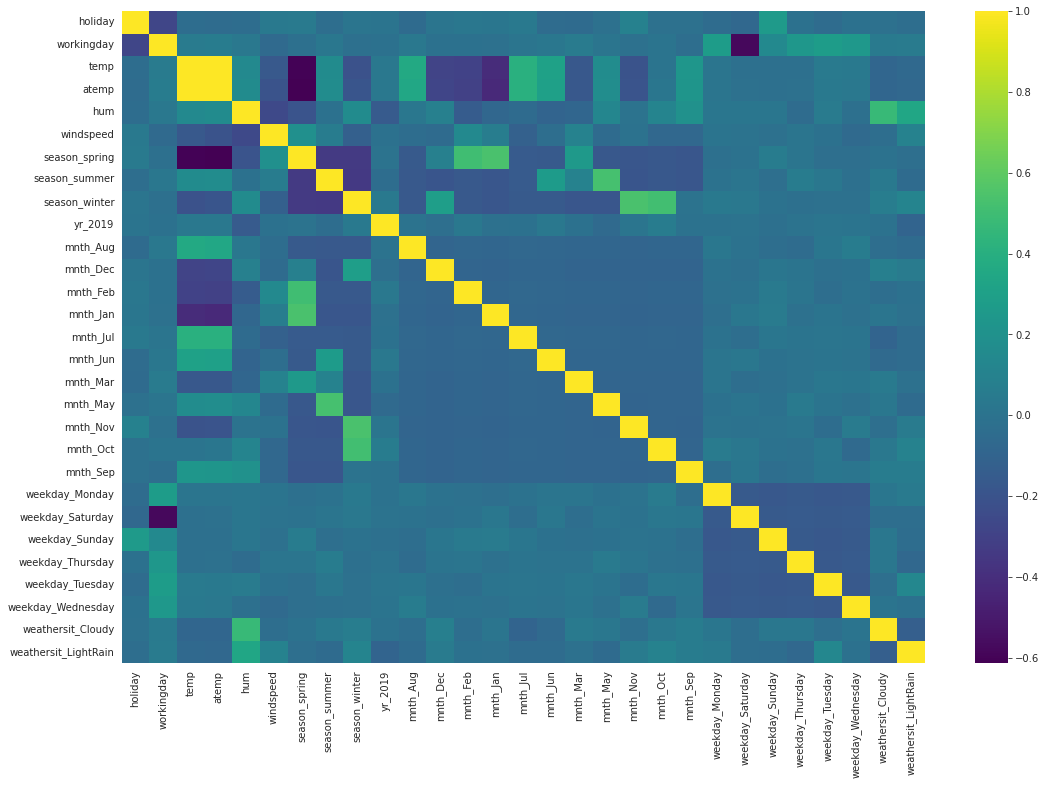

In [56]:
#Checking the correlation coefficients once again to see which variables are highly correlated
plt.figure(figsize = (18, 12))
sns.heatmap(X_train.corr(), annot = False, cmap="viridis")
plt.show()

### Model Building

**Multiple Lnear Regression**

In [57]:
#initial model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
print(model.intercept_)
print(model.coef_)

4016.8177976580014
[ -587.83734797    -9.04695255    -4.98114591   821.02130188
  -240.3531093   -224.54441277  -834.47012327    -9.81448761
   816.24180841  2045.77390063   -73.1029505   -621.59531937
  -355.27408302  -520.44373058  -549.78919862   -35.33280259
   115.93576418   213.18456034  -729.55352309   -37.12046123
   486.94494215  -159.30086436  -409.20483739  -260.01371362
   -14.97908187   -80.92180879   -81.66883188  -446.40876779
 -1665.94603   ]


In [59]:
#predictions on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [60]:
#regression loss for initial model
#MAE and RMSE
print('MAE of training data :              {}'.format(round(mean_absolute_error(y_train, y_train_pred),2)))
print('RMSE of training data :             {}'.format(round(mean_squared_error(y_train, y_train_pred, squared = False),2)))
print('MAE of test data :                  {}'.format(round(mean_absolute_error(y_test, y_test_pred),2)))
print('RMSE of test data :                 {}'.format(round(mean_squared_error(y_test, y_test_pred, squared = False),2)))

MAE of training data :              537.56
RMSE of training data :             740.35
MAE of test data :                  569.89
RMSE of test data :                 777.0


In [61]:
#model scores for initial model
print('R2 score on training data :             {}'.format(round(r2_score(y_train, y_train_pred),2)))
print('Adjusted R2 score on training data :    {}'.format(round(adjusted_r2(y_train, y_train_pred, X_train),2)))
print('R2 score on test data :                 {}'.format(round(r2_score(y_test, y_test_pred),2)))
print('Adjusted R2 score on test data :        {:.2f}'.format(round(adjusted_r2(y_test, y_test_pred, X_test),2)))

R2 score on training data :             0.86
Adjusted R2 score on training data :    0.85
R2 score on test data :                 0.83
Adjusted R2 score on test data :        0.81


#### Feature Selection using RFE (coarse tuning)

Recursive feature elimination reduces model complexity by removing featuresone by one until the optimal number of features is left. This is achieved byfitting the given machine learning algorithm used in the core of the model,ranking features by importance, discarding the least important features, andre-fitting the model.

In [62]:
#importing utility
from sklearn.feature_selection import RFE

In [63]:
#Eliminating features using RFE
selector = RFE(estimator = model, n_features_to_select = 16)
selector.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=16)

In [64]:
L = list(zip(X_train.columns,selector.support_,selector.ranking_))
len([k for k in L if k[1] == True])

16

In [65]:
L

[('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', False, 14),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 4),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 5),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 6),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_LightRain', True, 1)]

In [66]:
#columns selected by RFE
selected_cols = X_train.columns[selector.support_]
selected_cols

Index(['holiday', 'atemp', 'hum', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Cloudy',
       'weathersit_LightRain'],
      dtype='object')

#### Fine tuning using VIF and p-values corresponding to t-statistic

In [67]:
#function for building linear regression model using statsmodel api
def build_model(cols):
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    # fitting model to data
    lr = sm.OLS(y_train, X_train_lm).fit()
    return lr

In [68]:
#function to check for the VIF values of the feature variables. 
def get_vif(cols):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### Model 2

In [69]:
#builing model with features selected by RFE
cols = selected_cols
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          6.16e-187
Time:                        08:49:55   Log-Likelihood:                -4114.4
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     493   BIC:                             8335.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3919.2775     92.926     42.177      0.000    3736.699    4101.856
holiday               -729.5538    196.010     -3.722      0.000   -1114.671    -344.437
atemp                  794.0713     65.309     12.159      0.000     665.752     922.390
hum                   -152.6170     50.426     -3.027      0.003    -251.692     -53.542
season_spring         -798.1253    159.122     -5.016      0.000   -1110.766    -485.485
season_winter          861.3558    121.291      7.102      0.000     623.045    1099.666
yr_2019               2072.6691     71.542     28.971      0.000    1932.104    2213.234
mnth_Dec              -614.6558    152.983     -4.018      0.000    -915.235    -314.077
mnth_Feb              -470.1037    186.431     -2.522      0.012    -836.400    -103.807
mnth_Jan              -593.1874    187.531     -3.163      0.002    -961.647    -224.728
mnth_Jul              -403.0645    160.760     -2.507      0.012    -718.923     -87.206
mnth_May               243.9013    137.821      1.770      0.077     -26.887     514.690
mnth_Nov              -747.7316    160.548     -4.657      0.000   -1063.174    -432.289
mnth_Sep               548.8309    132.667      4.137      0.000     288.169     809.493
weekday_Saturday      -326.1751    104.038     -3.135      0.002    -530.588    -121.762
weathersit_Cloudy     -538.4459     94.152     -5.719      0.000    -723.435    -353.456
weathersit_LightRain -2006.4803    230.909     -8.689      0.000   -2460.168   -1552.793
==============================================================================
Omnibus:                       84.382   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.775
Skew:                          -0.723   Prob(JB):                     8.03e-66
Kurtosis:                       6.466   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#model 2 VIFs
get_vif(cols)

,Features,VIF
3,season_spring,4.24
1,atemp,2.83
4,season_winter,2.65
8,mnth_Jan,2.45
7,mnth_Feb,2.18
14,weathersit_Cloudy,1.99
5,yr_2019,1.94
11,mnth_Nov,1.90
2,hum,1.84
6,mnth_Dec,1.75


##### Model 3



*   Dropping '***atemp***' from list of features as it has high p-value and high VIF.  Most of the information that atemp has is explained by temp.



In [71]:
#dropping atemp
cols = ['holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [72]:
#model 3
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          5.97e-188
Time:                        08:49:57   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     494   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3998.8550     85.900     46.552      0.000    3830.080    4167.630
holiday               -675.1346    195.533     -3.453      0.001   -1059.314    -290.956
temp                   698.0816     62.939     11.091      0.000     574.421     821.742
windspeed             -188.5776     36.474     -5.170      0.000    -260.241    -116.915
season_spring         -800.5553    159.240     -5.027      0.000   -1113.427    -487.683
season_winter          735.4308    121.284      6.064      0.000     497.136     973.726
yr_2019               2113.2258     70.398     30.018      0.000    1974.909    2251.543
mnth_Dec              -711.8426    152.266     -4.675      0.000   -1011.011    -412.674
mnth_Feb              -494.6120    186.224     -2.656      0.008    -860.500    -128.724
mnth_Jan              -750.4795    186.483     -4.024      0.000   -1116.876    -384.083
mnth_Jul              -417.6882    161.002     -2.594      0.010    -734.022    -101.355
mnth_May               138.3245    135.713      1.019      0.309    -128.321     404.970
mnth_Nov              -745.1719    160.270     -4.649      0.000   -1060.066    -430.278
mnth_Sep               429.1833    131.822      3.256      0.001     170.182     688.184
weathersit_Cloudy     -705.6994     75.264     -9.376      0.000    -853.577    -557.822
weathersit_LightRain -2259.0940    200.561    -11.264      0.000   -2653.152   -1865.036
==============================================================================
Omnibus:                       82.603   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.266
Skew:                          -0.747   Prob(JB):                     5.02e-57
Kurtosis:                       6.157   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#model 3 VIFs
get_vif(cols)

,Features,VIF
3,season_spring,4.20
1,temp,2.78
4,season_winter,2.65
8,mnth_Jan,2.44
7,mnth_Feb,2.18
11,mnth_Nov,1.91
6,mnth_Dec,1.76
5,yr_2019,1.74
13,weathersit_Cloudy,1.45
9,mnth_Jul,1.42


##### Model 4



*  Dropping '***mnth_May***' based on high p-value.



In [74]:
#dropping mnth_May
cols = ['holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [75]:
#model 4
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          7.12e-189
Time:                        08:49:59   Log-Likelihood:                -4115.2
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4032.1428     79.453     50.749      0.000    3876.037    4188.249
holiday               -672.5632    195.525     -3.440      0.001   -1056.724    -288.403
temp                   698.5144     62.940     11.098      0.000     574.852     822.176
windspeed             -191.1530     36.388     -5.253      0.000    -262.646    -119.660
season_spring         -829.8744    156.627     -5.298      0.000   -1137.610    -522.139
season_winter          708.0394    118.273      5.986      0.000     475.660     940.419
yr_2019               2108.8661     70.271     30.010      0.000    1970.800    2246.932
mnth_Dec              -716.1466    152.213     -4.705      0.000   -1015.210    -417.083
mnth_Feb              -495.1165    186.230     -2.659      0.008    -861.016    -129.217
mnth_Jan              -752.2238    186.482     -4.034      0.000   -1118.618    -385.830
mnth_Jul              -451.2249    157.610     -2.863      0.004    -760.893    -141.557
mnth_Nov              -749.2000    160.227     -4.676      0.000   -1064.009    -434.391
mnth_Sep               403.3601    129.369      3.118      0.002     149.179     657.541
weathersit_Cloudy     -703.0337     75.222     -9.346      0.000    -850.827    -555.241
weathersit_LightRain -2263.9742    200.512    -11.291      0.000   -2657.933   -1870.015
==============================================================================
Omnibus:                       81.091   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.000
Skew:                          -0.740   Prob(JB):                     8.52e-55
Kurtosis:                       6.087   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#model 4 VIFs
get_vif(cols)

,Features,VIF
3,season_spring,4.19
1,temp,2.69
4,season_winter,2.63
8,mnth_Jan,2.43
7,mnth_Feb,2.18
10,mnth_Nov,1.90
6,mnth_Dec,1.76
5,yr_2019,1.72
12,weathersit_Cloudy,1.40
9,mnth_Jul,1.39


##### Model 5



*  '***mnth_Feb***' has on p-value of almost 0.011, so dropping this as well.



In [77]:
#dropping mnth_Feb
cols = ['holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [78]:
#model 5
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.62e-188
Time:                        08:50:01   Log-Likelihood:                -4118.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4012.7396     79.599     50.412      0.000    3856.346    4169.133
holiday               -681.3366    196.689     -3.464      0.001   -1067.783    -294.890
temp                   730.6405     62.146     11.757      0.000     608.539     852.742
windspeed             -191.7913     36.609     -5.239      0.000    -263.719    -119.864
season_spring        -1045.9405    134.709     -7.764      0.000   -1310.611    -781.270
season_winter          681.3569    118.565      5.747      0.000     448.405     914.309
yr_2019               2104.0642     70.676     29.770      0.000    1965.202    2242.926
mnth_Dec              -575.4713    143.591     -4.008      0.000    -857.592    -293.350
mnth_Jan              -473.3070    155.114     -3.051      0.002    -778.068    -168.546
mnth_Jul              -479.4712    158.211     -3.031      0.003    -790.317    -168.625
mnth_Nov              -682.0569    159.189     -4.285      0.000    -994.826    -369.288
mnth_Sep               404.2115    130.158      3.106      0.002     148.482     659.941
weathersit_Cloudy     -694.6027     75.613     -9.186      0.000    -843.164    -546.041
weathersit_LightRain -2261.7904    201.733    -11.212      0.000   -2658.147   -1865.434
==============================================================================
Omnibus:                       71.349   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.973
Skew:                          -0.653   Prob(JB):                     1.26e-47
Kurtosis:                       5.908   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#model 5 VIFs
get_vif(cols)

,Features,VIF
3,season_spring,2.63
1,temp,2.61
4,season_winter,2.59
9,mnth_Nov,1.86
5,yr_2019,1.71
7,mnth_Jan,1.68
6,mnth_Dec,1.55
11,weathersit_Cloudy,1.40
8,mnth_Jul,1.38
10,mnth_Sep,1.22


##### Model 6



*   Dropping '***holiday***' high p-value.


In [80]:
#dropping holiday
cols = ['temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [81]:
#model 6
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.66e-187
Time:                        08:50:04   Log-Likelihood:                -4121.3
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     496   BIC:                             8330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4019.9519     80.236     50.102      0.000    3862.308    4177.596
temp                   697.8739     63.623     10.969      0.000     572.870     822.878
windspeed             -195.5558     36.760     -5.320      0.000    -267.780    -123.331
season_spring         -840.9455    158.294     -5.313      0.000   -1151.956    -529.935
season_winter          716.8263    119.530      5.997      0.000     481.979     951.674
yr_2019               2107.5941     71.033     29.671      0.000    1968.031    2247.157
mnth_Dec              -738.1648    153.730     -4.802      0.000   -1040.207    -436.122
mnth_Feb              -505.9281    188.226     -2.688      0.007    -875.747    -136.110
mnth_Jan              -761.0283    188.490     -4.038      0.000   -1131.365    -390.692
mnth_Jul              -478.4685    159.121     -3.007      0.003    -791.102    -165.834
mnth_Nov              -805.8434    161.110     -5.002      0.000   -1122.385    -489.302
mnth_Sep               395.0261    130.752      3.021      0.003     138.131     651.921
weathersit_Cloudy     -698.9378     76.029     -9.193      0.000    -848.317    -549.559
weathersit_LightRain -2235.5217    202.517    -11.039      0.000   -2633.418   -1837.625
==============================================================================
Omnibus:                       90.728   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.623
Skew:                          -0.844   Prob(JB):                     1.27e-58
Kurtosis:                       6.114   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#model 6 VIFs
get_vif(cols)

,Features,VIF
2,season_spring,4.19
0,temp,2.68
3,season_winter,2.63
7,mnth_Jan,2.43
6,mnth_Feb,2.18
9,mnth_Nov,1.88
5,mnth_Dec,1.75
4,yr_2019,1.72
11,weathersit_Cloudy,1.40
8,mnth_Jul,1.39


##### Model 7



*   Dropping '***mnth_Feb***' for high p-value.



In [83]:
#dropping mnth_Feb
cols = ['temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [84]:
#model 7
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.97e-187
Time:                        08:50:06   Log-Likelihood:                -4125.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     497   BIC:                             8331.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3999.9568     80.389     49.758      0.000    3842.013    4157.901
temp                   730.7024     62.829     11.630      0.000     607.258     854.147
windspeed             -196.2670     36.989     -5.306      0.000    -268.940    -123.594
season_spring        -1061.9402    136.111     -7.802      0.000   -1329.365    -794.516
season_winter          689.6705    119.846      5.755      0.000     454.204     925.137
yr_2019               2102.6691     71.453     29.427      0.000    1962.282    2243.056
mnth_Dec              -594.6703    145.063     -4.099      0.000    -879.682    -309.658
mnth_Jan              -476.0571    156.819     -3.036      0.003    -784.166    -167.948
mnth_Jul              -507.7031    159.740     -3.178      0.002    -821.551    -193.855
mnth_Nov              -737.9698    160.112     -4.609      0.000   -1052.549    -423.390
mnth_Sep               395.7852    131.567      3.008      0.003     137.288     654.282
weathersit_Cloudy     -690.2656     76.435     -9.031      0.000    -840.441    -540.090
weathersit_LightRain -2232.9103    203.779    -10.958      0.000   -2633.284   -1832.536
==============================================================================
Omnibus:                       79.996   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.869
Skew:                          -0.752   Prob(JB):                     1.21e-50
Kurtosis:                       5.925   Cond. No.                         7.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#model 7 VIFs
get_vif(cols)

,Features,VIF
2,season_spring,2.62
0,temp,2.61
3,season_winter,2.59
8,mnth_Nov,1.84
4,yr_2019,1.71
6,mnth_Jan,1.68
5,mnth_Dec,1.55
10,weathersit_Cloudy,1.40
7,mnth_Jul,1.38
9,mnth_Sep,1.22


##### Model 8



*   Dropping '***mnth_Sep***' for hight p-value.



In [86]:
#dropping mnth_Sep
cols = ['temp', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'weathersit_Cloudy',
       'weathersit_LightRain']

In [87]:
#model 8
lr = build_model(cols)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.23e-186
Time:                        08:50:08   Log-Likelihood:                -4129.6
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     498   BIC:                             8334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4037.3804     80.060     50.430      0.000    3880.084    4194.677
temp                   764.1555     62.335     12.259      0.000     641.683     886.628
windspeed             -201.8387     37.240     -5.420      0.000    -275.005    -128.673
season_spring        -1065.4330    137.202     -7.765      0.000   -1334.999    -795.867
season_winter          714.5171    120.523      5.928      0.000     477.721     951.314
yr_2019               2099.4729     72.020     29.151      0.000    1957.972    2240.974
mnth_Dec              -626.8520    145.832     -4.298      0.000    -913.374    -340.330
mnth_Jan              -468.9300    158.063     -2.967      0.003    -779.482    -158.378
mnth_Jul              -599.5936    158.054     -3.794      0.000    -910.128    -289.059
mnth_Nov              -785.4248    160.615     -4.890      0.000   -1100.992    -469.857
weathersit_Cloudy     -673.6443     76.849     -8.766      0.000    -824.632    -522.657
weathersit_LightRain -2183.7500    204.757    -10.665      0.000   -2586.045   -1781.455
==============================================================================
Omnibus:                       77.184   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.959
Skew:                          -0.718   Prob(JB):                     5.20e-50
Kurtosis:                       5.936   Cond. No.                         7.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#model 8 VIFs
get_vif(cols)

,Features,VIF
2,season_spring,2.59
3,season_winter,2.54
0,temp,2.42
8,mnth_Nov,1.83
4,yr_2019,1.70
6,mnth_Jan,1.68
5,mnth_Dec,1.55
9,weathersit_Cloudy,1.37
7,mnth_Jul,1.33
1,windspeed,1.09


Final Model

*   The final model looks good. p-values corresponding to all the variables is very low, which means all the features in final model are significant.

*   VIFs are are < 3 for all the final set of features which mean very low multicollinearity.




In [89]:
#final features
cols

['temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'yr_2019',
 'mnth_Dec',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'weathersit_Cloudy',
 'weathersit_LightRain']

In [90]:
#final model
X_train = X_train[cols]
X_test = X_test[cols]
final_model = LinearRegression()
final_model.fit(X_train, y_train)
print(final_model.intercept_, final_model.coef_)

4037.3804079339725 [  764.15546235  -201.83869102 -1065.43302892   714.51713159
  2099.47289223  -626.8520331   -468.9299762   -599.59356955
  -785.42477961  -673.64430832 -2183.749977  ]


In [91]:
y_train_pred = final_model.predict(X_train)

### Residual Analysis (Testing assumptions of LR)

We can consider the very first assumption of LR to be satisfied as there indeed is a linear relationship between regressors and the target. We are able to fit a hyper-plane to the data.

Let's look at other assumtions of LR concerning **residues**.

##### Distribution of residues

Text(0.5, 0, 'Errors')

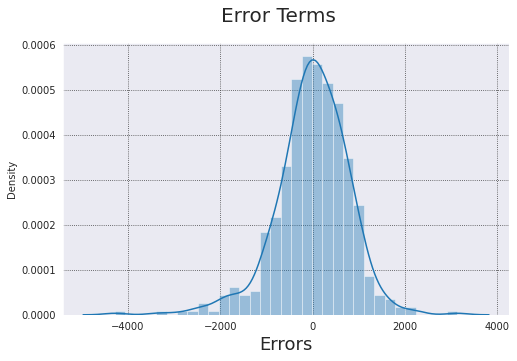

In [92]:
#residues
residue = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize = [8,5])
sns.distplot(residue)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



> It looks like the error terms are almost normally distributed with mean at 0.


##### Actual vs predicted values of target

Text(0, 0.5, 'y_train, y_train_pred')

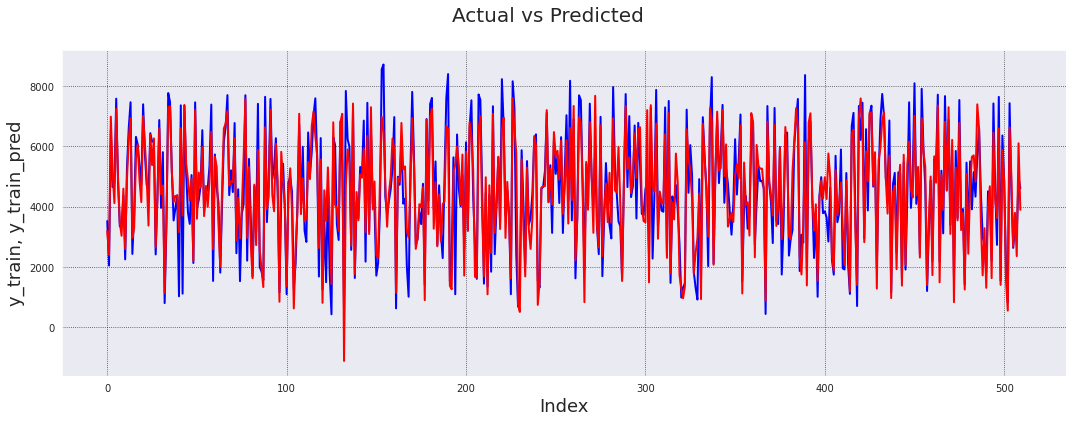

In [93]:
# Actual vs predicted
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize = [18,6])
plt.plot(c,y_train, color="blue", linewidth = 2)
plt.plot(c,y_train_pred, color="red", linewidth = 2)
fig.suptitle('Actual vs Predicted', fontsize=20)                   # Plot heading 
plt.xlabel('Index', fontsize=18)                                   # X-label
plt.ylabel('y_train, y_train_pred', fontsize=18)                   # Y-label

Text(0, 0.5, 'Residues')

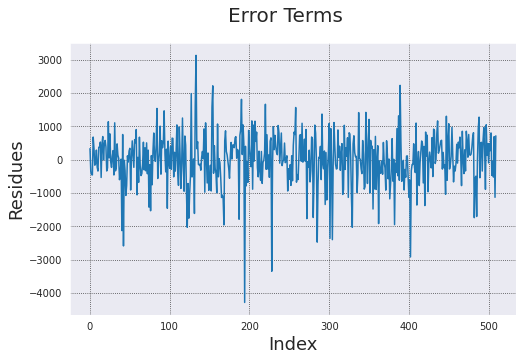

In [94]:
# Error terms
c = [i for i in range(0,len(y_train),1)]
fig = plt.figure(figsize = [8,5])
plt.plot(c, residue)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Residues', fontsize=18)                   # Y-label

##### Linearity check

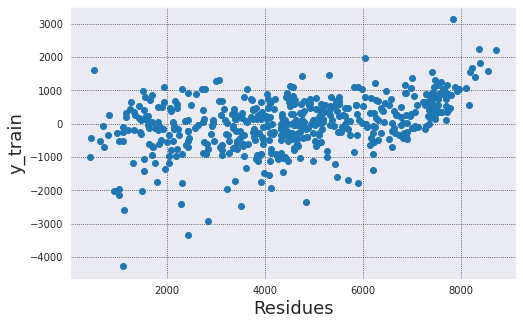

In [95]:
#scatter plot for linearity check
fig = plt.figure(figsize = [8,5])
plt.scatter(y_train, residue)
plt.ylabel("y_train", fontsize=18)
plt.xlabel("Residues", fontsize=18)
plt.show()



> The values look randomly distributed , therefore indipendent of each other.



##### Homoscedacity

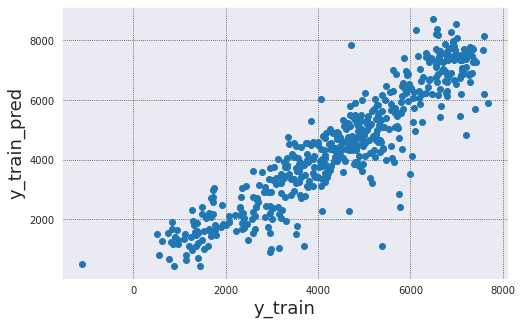

In [96]:
#scatter plot for linearity check
fig = plt.figure(figsize = [8,5])
plt.scatter(y_train_pred, y_train)
plt.ylabel("y_train_pred", fontsize=18)
plt.xlabel("y_train", fontsize=18)
plt.show()



> Looks like there is a constant variance in error terms. This can also be infrered from the normality test. Since the distribution of terms is almost normal, it can be said that error terms are part of same normal distribution and therefore have same variances.

Let's look at test data and prediction on it.


### Model Evaluation
Let's check the quality of fit now.

In [97]:
#predition on test data
y_pred = final_model.predict(X_test)

Let's now plot the graph for actual versus predicted values for new data, not seen by the model before.

Text(0, 0.5, 'y_pred')

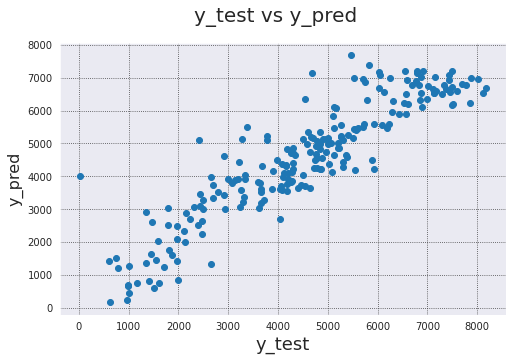

In [98]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize = [8,5])
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      



> It looks like the predicted values agree very much with the true values. Also, once again, we can see constant variance error terms, i.e, about the true regression line.



Text(0, 0.5, 'y-test, y-pred')

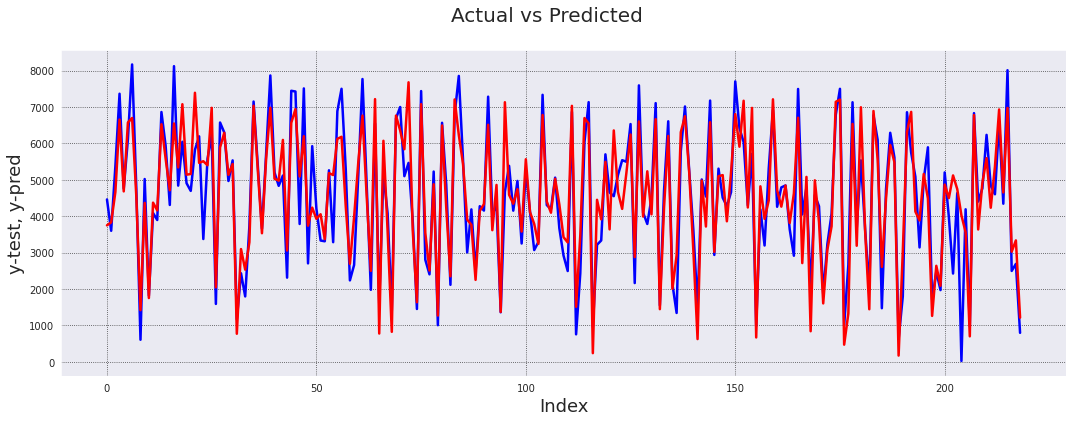

In [99]:
#prediction and actual values of target for test data
c = [i for i in range(0,len(y_test),1)]
fig = plt.figure(figsize = [18,6])
plt.plot(c,y_test, color="blue",linewidth=2.5)
plt.plot(c,y_pred, color="red",linewidth=2.5)
fig.suptitle('Actual vs Predicted', fontsize=20)      # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y-test, y-pred', fontsize=18)                   # Y-label



> Predicted values of target are very close to the true target values.



In [100]:
#regression loss for final model
#MAE and RMSE
print('MAE of training data :              {}'.format(round(mean_absolute_error(y_train, y_train_pred),2)))
print('RMSE of training data :             {}'.format(round(mean_squared_error(y_train, y_train_pred, squared = False),2)))
print('MAE of test data :                  {}'.format(round(mean_absolute_error(y_test, y_pred),2)))
print('RMSE of test data :                 {}'.format(round(mean_squared_error(y_test, y_pred, squared = False),2)))

MAE of training data :              586.05
RMSE of training data :             794.9
MAE of test data :                  609.19
RMSE of test data :                 808.14


In [101]:
#model scores for final model
print('R2 score on training data :             {}'.format(round(r2_score(y_train, y_train_pred),2)))
print('Adjusted R2 score on training data :    {}'.format(round(adjusted_r2(y_train, y_train_pred, X_train),2)))
print('R2 score on test data :                 {}'.format(round(r2_score(y_test, y_pred),2)))
print('Adjusted R2 score on test data :        {}'.format(round(adjusted_r2(y_test, y_pred, X_test),2)))

R2 score on training data :             0.83
Adjusted R2 score on training data :    0.83
R2 score on test data :                 0.82
Adjusted R2 score on test data :        0.81




> The model has performed well and it is generalising enough.



### Model Interpretation

Accordin to the final model, the variables that have an effect on demand of bikes (target) are:
1. 'temp',
2. 'windspeed',
3. 'season_spring',
4. 'season_winter',
5. 'yr_2019',
6. 'mnth_Dec',
7. 'mnth_Jan',
8. 'mnth_Jul',
9. 'mnth_Nov',
10. 'weathersit_Cloudy',
11. 'weathersit_LightRain'

Most important variables to consider achieve maximum booking are,

* Temperature (temp) - A coefficient value of ‘746.5’ indicated that a unit increase in temp variable increases the bike hire numbers by 746.5 units.
* Season (season_spring) - A coefficient value of ‘-1001.6’ indicated that, w.r.t season, a unit increase in season_spring variable decreases the bike hire numbers by -1001.6 units.
* Weather situation (weathersit_LightRain) - A coefficient value of ‘-2385.2’ indicated that, a unit increase in weathersit_LightRain variable decreases the bike hire numbers by -2385.2 units.
* Year (yr) - A coefficient value of ‘2095’ indicated that a unit increase in yr variable increases the bike demand by 2095 units.

Rcommendations. Boombikes should focus on taking following action to optimise their business and make it more profitable:
* Boombikes should expand more duting the time of the year when temperatures are low to moderate.
* They should avoid on exapanding duting spring season. They should instead expand in winter season.
* It also looks like the number of users are already increasing from year 2018 to 2019. They should be ready for growth next year.
* Boombikes should definitely avoid expanding/advertising duting bad weather. They should probably use this time to repair electronic systems and bikes.